In [1]:
# Data analysis and visualization
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 

# Preprocessing and evaluation
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler

In [2]:
(X_train , y_train), (X_test , y_test) = tf.keras.datasets.boston_housing.load_data(path = 'boston_housing_npz', test_split = 0.2, seed = 42)

In [3]:
(X_train.shape, type(X_train)), (X_test.shape, type(X_test)), (y_train.shape, type(y_train)), (y_test.shape, type(y_test)),

(((404, 13), numpy.ndarray),
 ((102, 13), numpy.ndarray),
 ((404,), numpy.ndarray),
 ((102,), numpy.ndarray))

In [4]:
X_train_df = pd.DataFrame(X_train)
y_train_df = pd.DataFrame(y_train)

X_train_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.09178,0.0,4.05,0.0,0.510,6.416,84.1,2.6463,5.0,296.0,16.6,395.50,9.04
1,0.05644,40.0,6.41,1.0,0.447,6.758,32.9,4.0776,4.0,254.0,17.6,396.90,3.53
2,0.10574,0.0,27.74,0.0,0.609,5.983,98.8,1.8681,4.0,711.0,20.1,390.11,18.07
3,0.09164,0.0,10.81,0.0,0.413,6.065,7.8,5.2873,4.0,305.0,19.2,390.91,5.52
4,5.09017,0.0,18.10,0.0,0.713,6.297,91.8,2.3682,24.0,666.0,20.2,385.09,17.27


In [5]:
(X_train_df.shape, type(X_train_df)), (y_train_df.shape, type(y_train_df)),

(((404, 13), pandas.core.frame.DataFrame),
 ((404, 1), pandas.core.frame.DataFrame))

In [6]:
X_train_df.info()
y_train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404 entries, 0 to 403
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       404 non-null    float64
 1   1       404 non-null    float64
 2   2       404 non-null    float64
 3   3       404 non-null    float64
 4   4       404 non-null    float64
 5   5       404 non-null    float64
 6   6       404 non-null    float64
 7   7       404 non-null    float64
 8   8       404 non-null    float64
 9   9       404 non-null    float64
 10  10      404 non-null    float64
 11  11      404 non-null    float64
 12  12      404 non-null    float64
dtypes: float64(13)
memory usage: 41.2 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404 entries, 0 to 403
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       404 non-null    float64
dtypes: float64(1)
memory usage: 3.3 KB


In [7]:
X_train_df.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.789989,11.568069,11.214059,0.069307,0.554524,6.284824,69.119307,3.792258,9.660891,408.960396,18.481931,356.293020,12.825520
std,9.132761,24.269648,6.925462,0.254290,0.116408,0.723759,28.034606,2.142651,8.736073,169.685166,2.157322,92.058615,7.308772
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.137000,1.000000,187.000000,12.600000,0.320000,1.920000
25%,0.081960,0.000000,5.190000,0.000000,0.452000,5.878750,45.475000,2.097050,4.000000,281.000000,17.400000,375.085000,7.092500
50%,0.262660,0.000000,9.690000,0.000000,0.538000,6.210000,77.500000,3.167500,5.000000,330.000000,19.100000,391.305000,11.560000
75%,3.717875,12.500000,18.100000,0.000000,0.624000,6.620500,94.425000,5.118000,24.000000,666.000000,20.200000,395.810000,17.167500
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


In [8]:
# Create column transformer
ct = make_column_transformer((MinMaxScaler(), [0, 1, 2, 4, 5, 6, 7, 8, 9, 10, 11, 12]))

# Normalization and data type change
X_train = ct.fit_transform(X_train).astype('float32')
X_test = ct.transform(X_test).astype('float32')
y_train = y_train.astype('float32')
y_test = y_test.astype('float32')
 
# Distribution of X_train feature values after normalization
pd.DataFrame(X_train).describe()

,0,1,2,3,4,5,6,7,8,9,10,11
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,0.042528,0.115681,0.394210,0.348815,0.521905,0.681970,0.241618,0.376560,0.423589,0.625737,0.897607,0.302511
std,0.102650,0.242696,0.253866,0.239522,0.138678,0.288719,0.194973,0.379829,0.323827,0.229502,0.232131,0.202740
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000850,0.000000,0.173387,0.137860,0.444098,0.438466,0.087361,0.130435,0.179389,0.510638,0.944992,0.143481
50%,0.002881,0.000000,0.338343,0.314815,0.507569,0.768280,0.184767,0.173913,0.272901,0.691489,0.985892,0.267406
75%,0.041717,0.125000,0.646628,0.491770,0.586223,0.942585,0.362255,1.000000,0.914122,0.808511,0.997252,0.422954
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [9]:
# Reserve data for validation
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=42)
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((363, 12), (41, 12), (363,), (41,))

learning rate = 0.01,
batch_size = 32,
dense_layers = 2,
hidden_units for Dense_1 layer= 10,
hidden_units for Dense_2 layer = 100

In [10]:
# Set random seed
tf.random.set_seed(42)

# Building the model
model = tf.keras.Sequential(
  [tf.keras.layers.Dense(units=10, activation='relu', input_shape=(X_train.shape[1],), name='Dense_1'),
  tf.keras.layers.Dense(units=100, activation='relu', name='Dense_2'),
  tf.keras.layers.Dense(units=1, name='Prediction')]
)

# Compiling the model
model.compile(
    loss = tf.keras.losses.mean_squared_error,
    optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.01),
    metrics = ['mse']
)

# Training the model
history = model.fit(
    X_train,
    y_train,
    batch_size=32,
    epochs=50,
    validation_data=(X_val, y_val)
)

c:\Users\MYPC\anaconda3\envs\deepf\lib\site-packages\keras\src\layers\core\dense.py:85: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 411.3407 - mse: 412.0651 - val_loss: 91.9698 - val_mse: 122.5654
Epoch 2/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 85.3687 - mse: 85.1007 - val_loss: 57.6667 - val_mse: 74.8042
Epoch 3/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 54.6032 - mse: 54.4884 - val_loss: 45.0707 - val_mse: 55.0688
Epoch 4/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 44.1924 - mse: 44.1637 - val_loss: 41.9340 - val_mse: 48.4411
Epoch 5/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 40.0634 - mse: 40.0751 - val_loss: 38.6235 - val_mse: 43.7454
Epoch 6/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 36.6120 - mse: 36.6436 - val_loss: 34.4054 - val_mse: 38.9029
Epoch 7/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 33.4865 - mse: 33.5290 - val_loss: 30.0413 - val_mse: 34.2416
Epoch 8/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 30.7331 - mse: 30.7793 - val_loss: 26.1869 - val_mse: 30.1942
Epoch 9/50
12/12 ━━━━━━━━━━━━━━━━━━━

In [11]:
# Preview the mean value of training and validation data
y_train.mean(), y_val.mean()

(22.235537, 24.89756)

In [12]:
# Evaluate the model on the test data
print("Evaluation on Test data \n")
loss, mse = model.evaluate(X_test, y_test, batch_size=32)
print(f"\nModel loss on test set: {loss}")
print(f"Model mean squared error on test set: {(mse):.2f}")

Evaluation on Test data 

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 25.8121 - mse: 27.3186 

Model loss on test set: 24.907114028930664
Model mean squared error on test set: 28.67


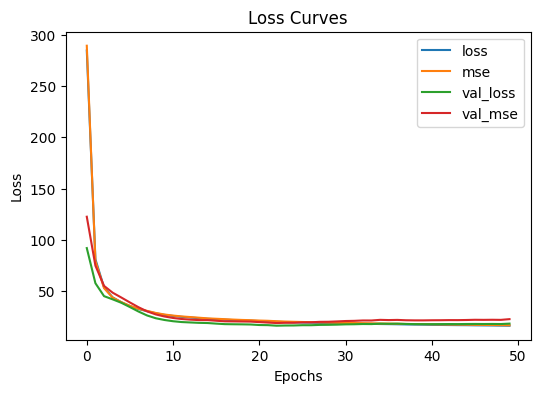

In [13]:
# Plot the loss curves
pd.DataFrame(history.history).plot(figsize=(6, 4), xlabel="Epochs", ylabel="Loss", title='Loss Curves')
plt.show()

In [14]:
y_test[0]

22.4

In [15]:
y_pred = model.predict(X_test)

y_pred[0]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


array([20.91973], dtype=float32)